In [42]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv("D:/OneDrive/文档/GitHub/Big-Data-2020Fall/lab2/bank.csv")
cols = df.columns.values
cols = [col.replace('\"','') for col in cols[0].split(';')]
print(cols)

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


In [43]:
datas = []
for i in range(len(df)):
    s = df.iloc[i].values[0]
    datas.append([item.replace('\"','') for item in s.split(';')])
datas = np.array(datas)
print(datas)

[['30' 'unemployed' 'married' ... '0' 'unknown' 'no']
 ['33' 'services' 'married' ... '4' 'failure' 'no']
 ['35' 'management' 'single' ... '1' 'failure' 'no']
 ...
 ['57' 'technician' 'married' ... '0' 'unknown' 'no']
 ['28' 'blue-collar' 'married' ... '3' 'other' 'no']
 ['44' 'entrepreneur' 'single' ... '7' 'other' 'no']]


In [44]:
df_frame = {}
for i in range(len(cols)):
    df_frame[cols[i]] = datas[:,i]
df = pd.DataFrame(df_frame)
print(df)

     age            job  marital  education default balance housing  ... month duration campaign pdays previous poutcome   y
0     30     unemployed  married    primary      no    1787      no  ...   oct       79        1    -1        0  unknown  no
1     33       services  married  secondary      no    4789     yes  ...   may      220        1   339        4  failure  no
2     35     management   single   tertiary      no    1350     yes  ...   apr      185        1   330        1  failure  no
3     30     management  married   tertiary      no    1476     yes  ...   jun      199        4    -1        0  unknown  no
4     59    blue-collar  married  secondary      no       0     yes  ...   may      226        1    -1        0  unknown  no
...   ..            ...      ...        ...     ...     ...     ...  ...   ...      ...      ...   ...      ...      ...  ..
4516  33       services  married  secondary      no    -333     yes  ...   jul      329        5    -1        0  unknown  no


In [45]:
df_frame = {}
for i in range(len(cols)):
    df_frame[cols[i]] = datas[:,i]
df = pd.DataFrame(df_frame)
print(df)

     age            job  marital  education default balance housing  ... month duration campaign pdays previous poutcome   y
0     30     unemployed  married    primary      no    1787      no  ...   oct       79        1    -1        0  unknown  no
1     33       services  married  secondary      no    4789     yes  ...   may      220        1   339        4  failure  no
2     35     management   single   tertiary      no    1350     yes  ...   apr      185        1   330        1  failure  no
3     30     management  married   tertiary      no    1476     yes  ...   jun      199        4    -1        0  unknown  no
4     59    blue-collar  married  secondary      no       0     yes  ...   may      226        1    -1        0  unknown  no
...   ..            ...      ...        ...     ...     ...     ...  ...   ...      ...      ...   ...      ...      ...  ..
4516  33       services  married  secondary      no    -333     yes  ...   jul      329        5    -1        0  unknown  no


In [46]:
df[['age','balance','duration','campaign','pdays','previous']] = df[['age','balance','duration','campaign','pdays','previous']].astype(int)
df.dtypes

age           int32
job          object
marital      object
education    object
default      object
balance       int32
housing      object
loan         object
contact      object
day          object
month        object
duration      int32
campaign      int32
pdays         int32
previous      int32
poutcome     object
y            object
dtype: object

<AxesSubplot:>

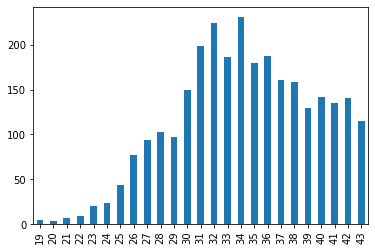

In [47]:
df['age'].value_counts().sort_index().head(25).plot.bar()

<AxesSubplot:>

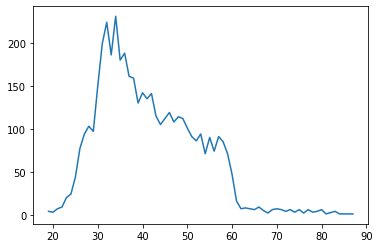

In [48]:
df['age'].value_counts().sort_index().plot.line()

In [49]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4516    False
4517    False
4518    False
4519    False
4520    False
Length: 4521, dtype: bool

In [50]:
df.drop_duplicates()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [51]:
class_mapping = {'no':0, 'yes':1}
df['default'] = df['default'].map(class_mapping)
df['housing'] = df['housing'].map(class_mapping)
df['loan'] = df['loan'].map(class_mapping)
df['y'] = df['y'].map(class_mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0


In [52]:
month_dict = {'oct':'10','may':'05','apr':'04','jun':'06','feb':'02','aug':'08','jan':'01','jul':'07','nov':'11','sep':'09','mar':'03','dec':'12'}
df['month'] = df['month'].map(month_dict)
df['date'] = '2019' + '-' + df['month'] + '-' +df['day']
df['date'] = pd.to_datetime(df['date'],format="%Y-%m-%d")
df['date'] = pd.to_datetime('2020-01-01',format="%Y-%m-%d") - df['date']
df['date'] = df['date'].dt.days
print(df['date'])

0        74
1       235
2       260
3       212
4       241
       ... 
4516    155
4517    237
4518    135
4519    329
4520    273
Name: date, Length: 4521, dtype: int64


In [53]:
del(df['day'])
del(df['month'])

In [54]:
jobs = df['job'].unique()
job_mapping = {jobs[i]:i for i in range(jobs.shape[0])}

maritals = df['marital'].unique()
marital_mapping = {maritals[i]:i for i in range(maritals.shape[0])}

educations = df['education'].unique()
education_mapping = {educations[i]:i for i in range(educations.shape[0])}

contacts = df['contact'].unique()
contact_mapping = {contacts[i]:i for i in range(contacts.shape[0])}

poutcomes = df['poutcome'].unique()
poutcome_mapping = {poutcomes[i]:i for i in range(poutcomes.shape[0])}

df['marital'] = df['marital'].map(marital_mapping)
df['job'] = df['job'].map(job_mapping)
df['education'] = df['education'].map(education_mapping)
df['contact'] = df['contact'].map(contact_mapping)
df['poutcome'] = df['poutcome'].map(poutcome_mapping)
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date
0,30,0,0,0,0,1787,0,0,0,79,1,-1,0,0,0,74
1,33,1,0,1,0,4789,1,1,0,220,1,339,4,1,0,235
2,35,2,1,2,0,1350,1,0,0,185,1,330,1,1,0,260
3,30,2,0,2,0,1476,1,1,1,199,4,-1,0,0,0,212
4,59,3,0,1,0,0,1,0,1,226,1,-1,0,0,0,241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,0,1,0,-333,1,0,0,329,5,-1,0,0,0,155
4517,57,4,0,2,1,-3313,1,1,1,153,1,-1,0,0,0,237
4518,57,5,0,1,0,295,0,0,0,151,11,-1,0,0,0,135
4519,28,3,0,1,0,1137,0,0,0,129,4,211,3,2,0,329


In [55]:
bins = [18,25,35,45,55,100] # 指定年龄的分界点
df['age'] = pd.cut(df['age'],bins,labels=False)
bins = [-np.inf,4137.1,11587.2,np.inf]
df['balance'] = pd.cut(df['balance'],bins, labels=False)
print(df[['age','balance']])

      age  balance
0       1        0
1       1        1
2       1        0
3       1        0
4       4        0
...   ...      ...
4516    1        0
4517    4        0
4518    4        0
4519    1        0
4520    2        0

[4521 rows x 2 columns]


In [56]:
cols = ['pdays','duration','campaign','date']
for col in cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
print(df[['pdays','duration','campaign','date']])

         pdays  duration  campaign      date
0     0.000000  0.024826  0.000000  0.203911
1     0.389908  0.071500  0.000000  0.653631
2     0.379587  0.059914  0.000000  0.723464
3     0.000000  0.064548  0.061224  0.589385
4     0.000000  0.073486  0.000000  0.670391
...        ...       ...       ...       ...
4516  0.000000  0.107580  0.081633  0.430168
4517  0.000000  0.049321  0.000000  0.659218
4518  0.000000  0.048659  0.204082  0.374302
4519  0.243119  0.041377  0.061224  0.916201
4520  0.286697  0.112877  0.020408  0.759777

[4521 rows x 4 columns]


In [57]:
df.to_csv("D:/OneDrive/文档/GitHub/Big-Data-2020Fall/lab2/after_bank.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,date
0,1,0,0,0,0,0,0,0,0,0.024826,0.000000,0.000000,0,0,0,0.203911
1,1,1,0,1,0,1,1,1,0,0.071500,0.000000,0.389908,4,1,0,0.653631
2,1,2,1,2,0,0,1,0,0,0.059914,0.000000,0.379587,1,1,0,0.723464
3,1,2,0,2,0,0,1,1,1,0.064548,0.061224,0.000000,0,0,0,0.589385
4,4,3,0,1,0,0,1,0,1,0.073486,0.000000,0.000000,0,0,0,0.670391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,1,1,0,1,0,0,1,0,0,0.107580,0.081633,0.000000,0,0,0,0.430168
4517,4,4,0,2,1,0,1,1,1,0.049321,0.000000,0.000000,0,0,0,0.659218
4518,4,5,0,1,0,0,0,0,0,0.048659,0.204082,0.000000,0,0,0,0.374302
4519,1,3,0,1,0,0,0,0,0,0.041377,0.061224,0.243119,3,2,0,0.916201


In [58]:
from sklearn.tree import DecisionTreeClassifier as DTC, export_graphviz
#读取数据
df = pd.read_csv("D:/OneDrive/文档/GitHub/Big-Data-2020Fall/lab2/after_bank.csv")
df = df.iloc[:,1:]
cols = list(df.columns.values)
cols.remove('y')
X = df[cols]
y = df[['y']]

In [59]:
#划分训练集与测试集
X_train = X[:4000]
y_train = y[:4000]
X_test = X[4000:5000]
y_test = y[4000:5000]

In [63]:
dtc = DTC(criterion='gini',max_depth=5) #基于基尼系数
dtc.fit(X_train,y_train)
print('准确率',dtc.score(X_test,y_test))

准确率 0.9001919385796545


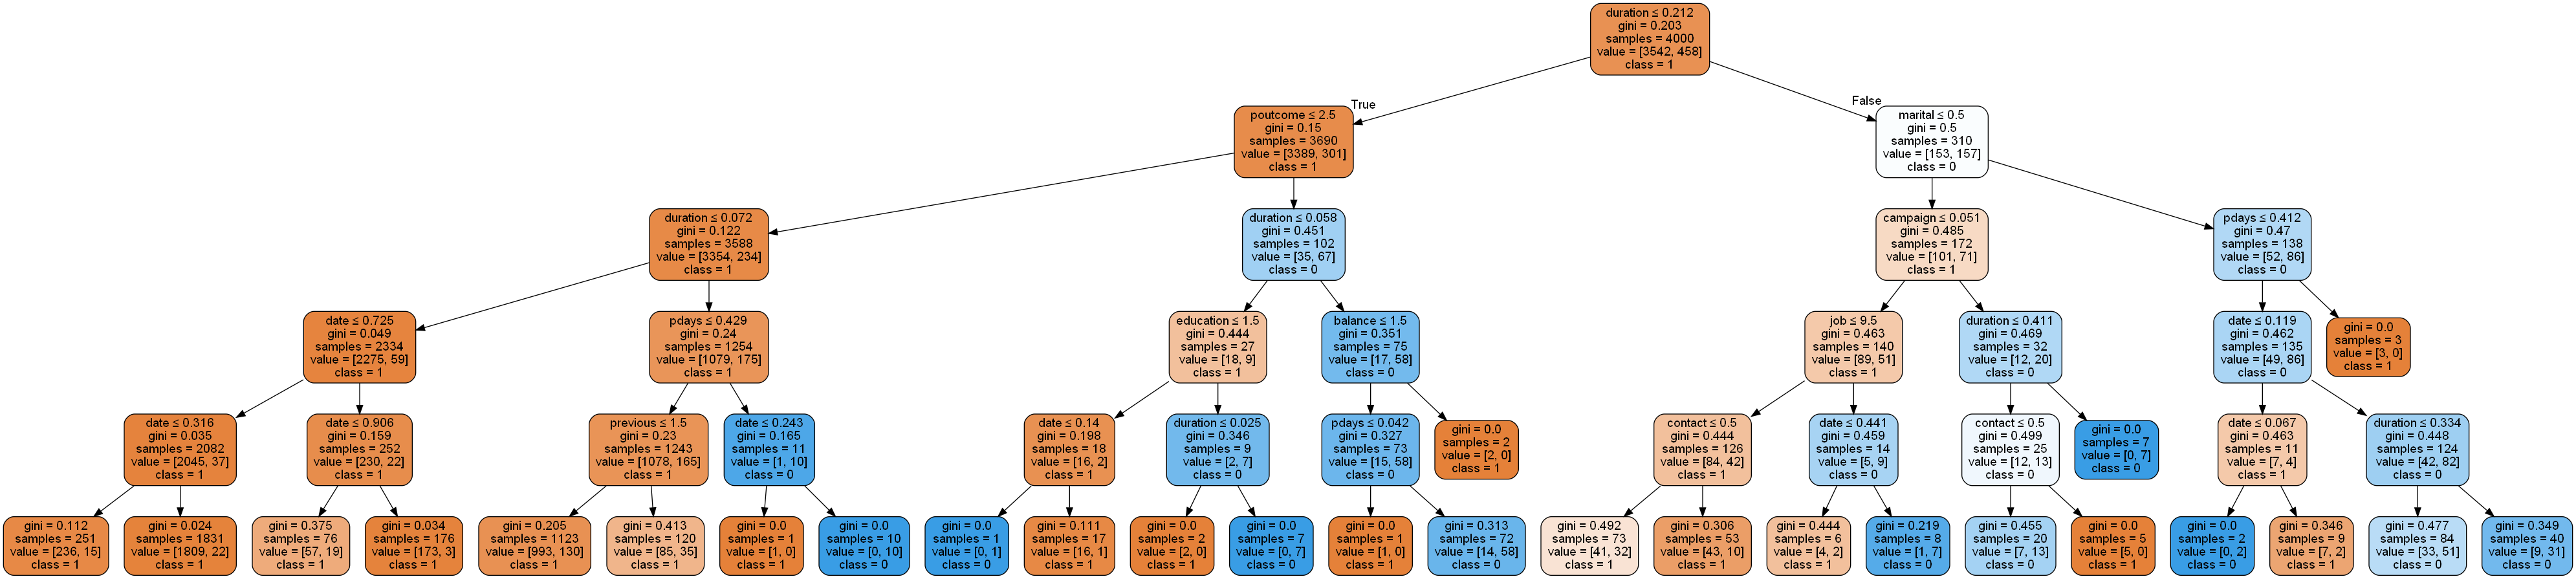

In [70]:
from IPython.display import Image
from sklearn import tree
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz 2.44.1/bin'
dot_data = tree.export_graphviz(dtc,out_file=None,
                               feature_names=X_train.columns,
                               class_names=['1','0'],
                               filled=True,
                               rounded=True,
                               special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("D:/OneDrive/文档/GitHub/Big-Data-2020Fall/lab2/result.gif")

Image(graph.create_png())